# Satellite images of dust (split-window difference)

In [ ]:
import SWD
import datetime
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt
import numpy as np

**Select region for visualization:**

In [2]:
#--- US Southwest
# latitude_north = 40.5
# latitude_south = 27.5
# longitude_west = -123
# longitude_east = -100

#--- US Southwest (zoomed out)
latitude_north = 44
latitude_south = 27.5
longitude_west = -128
longitude_east = -100

**Opening SWD from file:**

In [ ]:
#--- Needs improvement
BTD = xr.open_dataarray("swd_files/satellite_btd_2025_01_30_01Z.nc")

**Running SWD for one day:**

In [7]:
year = 2025
month = 1
day = 30
hour = 0

julian_day = datetime.datetime(year, month, day).strftime('%j')
print(julian_day)

datetime_str = str(year)+'-'+str(month).zfill(2)+'-'+str(day).zfill(2)+' '+str(hour).zfill(2)+'Z'
print(datetime_str)

BTD = SWD.makeSWD(year, julian_day, month, day, hour, datetime_str, latitude_north, latitude_south, longitude_west, longitude_east)

noaa-goes16/ABI-L1b-RadF/2025/011/00/OR_ABI-L1b-RadF-M6C15_G16_s20250110000204_e20250110009518_c20250110009578.nc


/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_40489/1395956398.py:1: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  BTD = SWD.makeSWD(year, julian_day, month, day, hour, datetime_str, latitude_north, latitude_south, longitude_west, longitude_east)
/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_40489/1395956398.py:1: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  BTD = SWD.makeSWD(year, julian_day, month, day, hour, datetime_str, latitude_north, latitude_south, longitude_west, longitude_east)


**Plotting the SWD BTD:**

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_40489/681130703.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


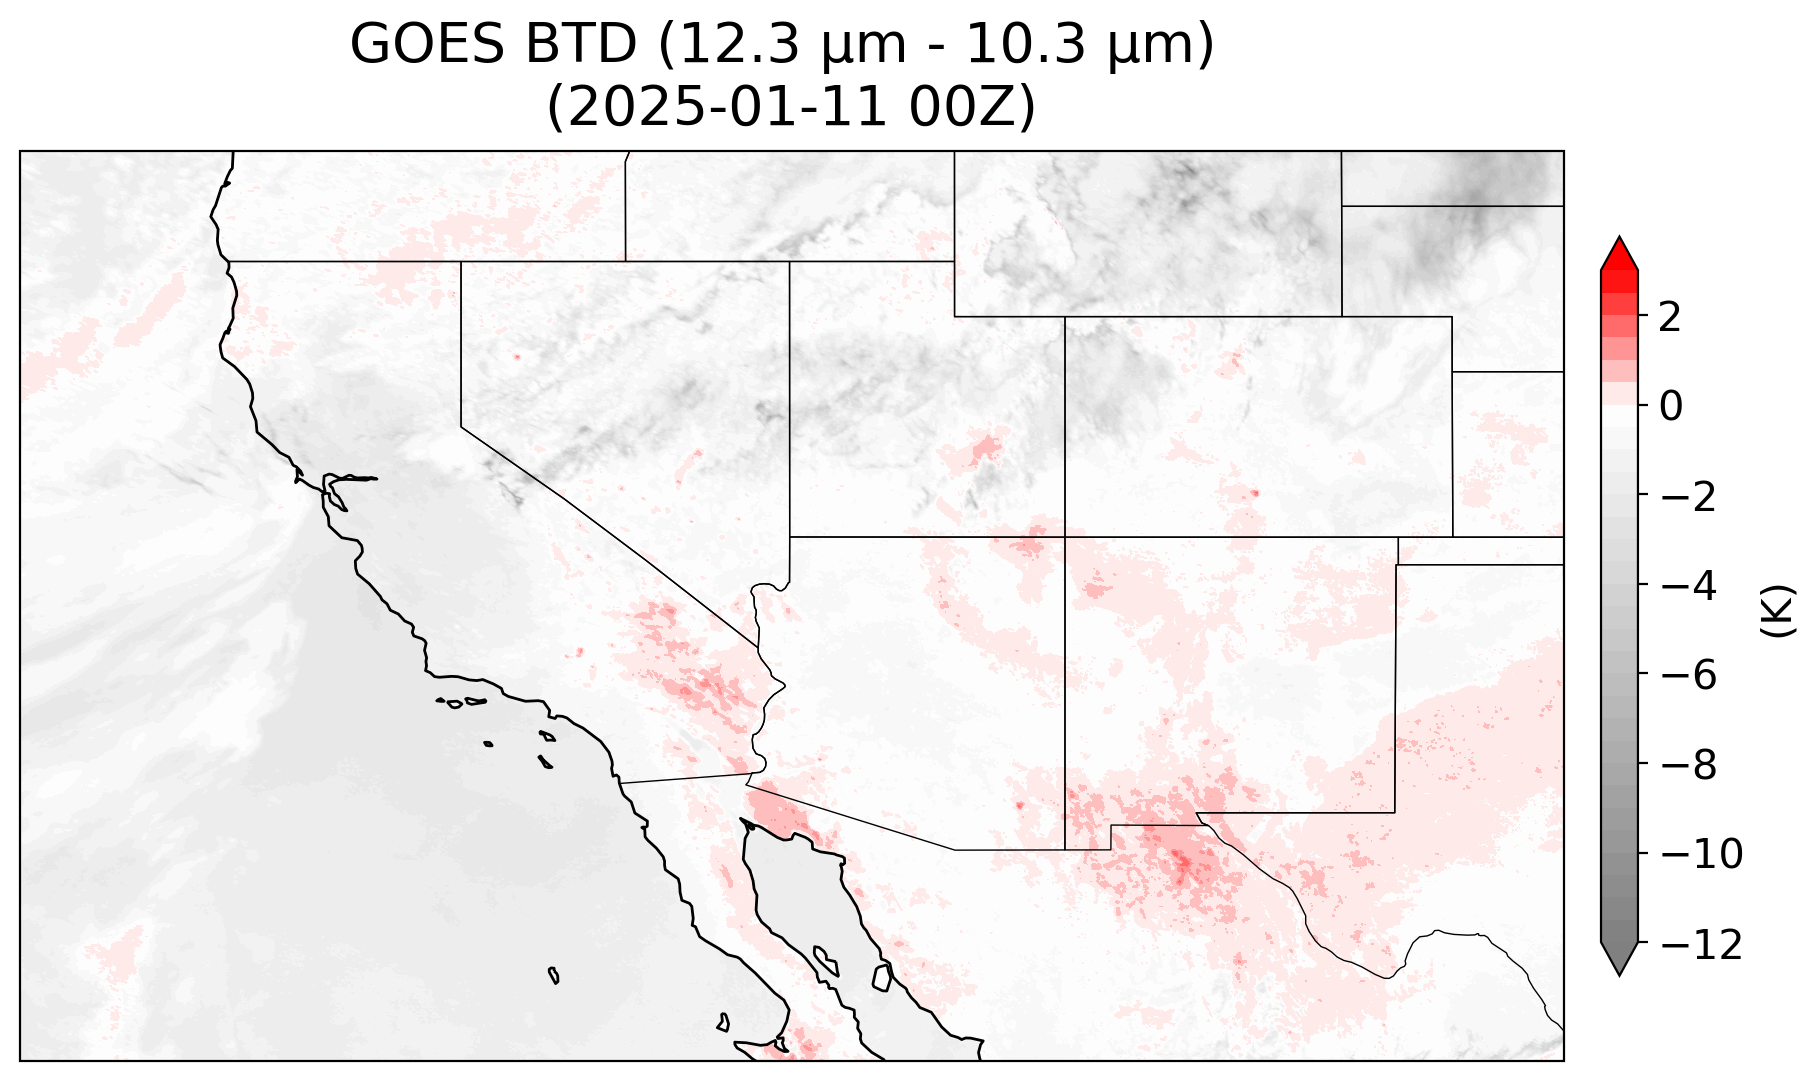

In [8]:
projection=ccrs.PlateCarree(central_longitude=0)

fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

#---Custom colorbar
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# Define custom colormap: Greys for negative, Reds for positive
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['grey', 'white', 'red'])
# Use TwoSlopeNorm to center at 0
norm = TwoSlopeNorm(vmin=-12, vcenter=0, vmax=3)

levels = np.linspace(-12, 3, 31)

c=ax.contourf(BTD.lon, BTD.lat, BTD, cmap=cmap, extend='both', norm=norm, levels=levels)


clb = plt.colorbar(c, shrink=0.4, pad=0.02, ax=ax)
clb.ax.tick_params(labelsize=15)
clb.set_label('(K)', fontsize=15)

ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

ax.set_title("GOES BTD (12.3 μm - 10.3 μm) \n("+datetime_str+")", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(feature.STATES, zorder=100, edgecolor='#000', facecolor='none', linewidth=0.5)

fig.set_dpi(200)
#fig.savefig("swd_images/satellite_btd_"+date_str, dpi=200, bbox_inches='tight')
fig.show()